In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\Data_Science_Jupyter_Files\FuelConsumptionCo2.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

In [5]:
# statistical summary of the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
new_df = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
new_df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
663,2.5,6,10.4,239
575,2.4,4,10.9,251
833,3.7,6,11.5,264
336,1.4,4,7.8,179
552,5.0,8,13.3,306


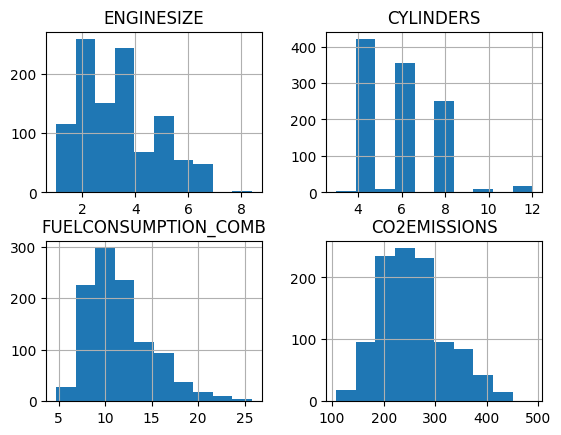

In [7]:
viz = new_df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
viz.hist()
plt.show()

In [8]:
import seaborn as sns

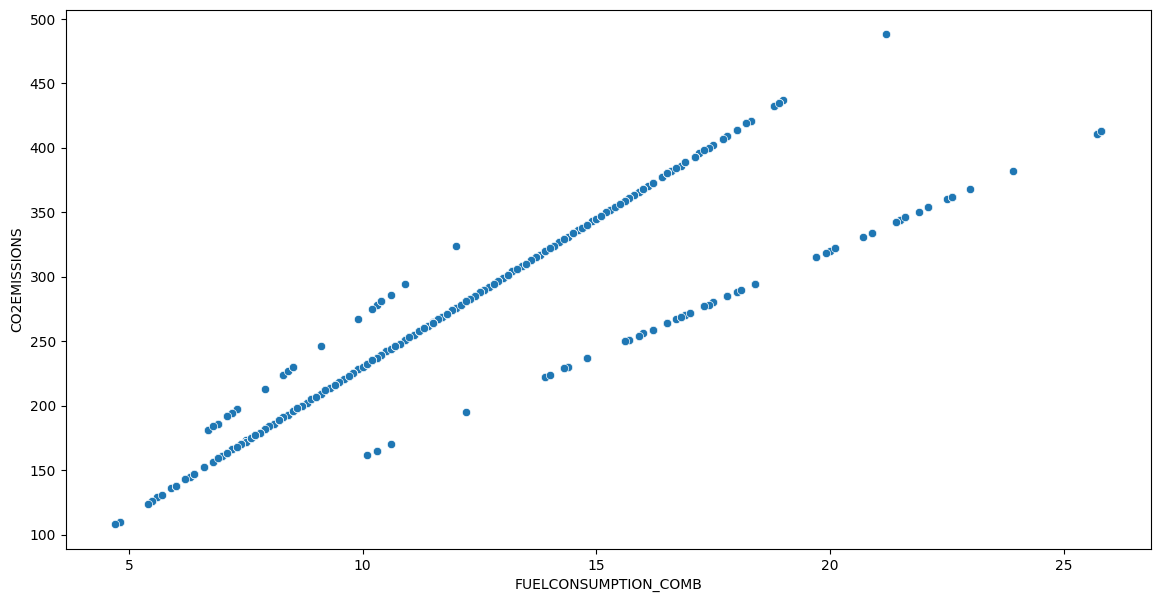

In [10]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=new_df.FUELCONSUMPTION_COMB, y=new_df.CO2EMISSIONS)
plt.show()

In [11]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

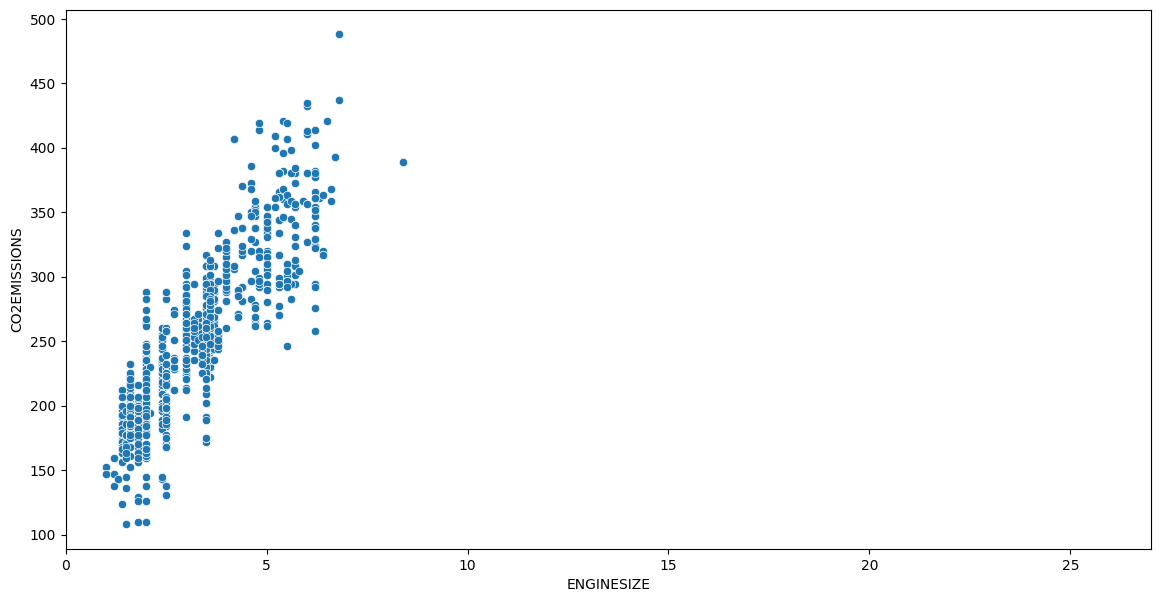

In [20]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=new_df.ENGINESIZE, y=new_df.CO2EMISSIONS)
plt.xlim(0,27)
plt.show()

In [22]:
df["VEHICLECLASS"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

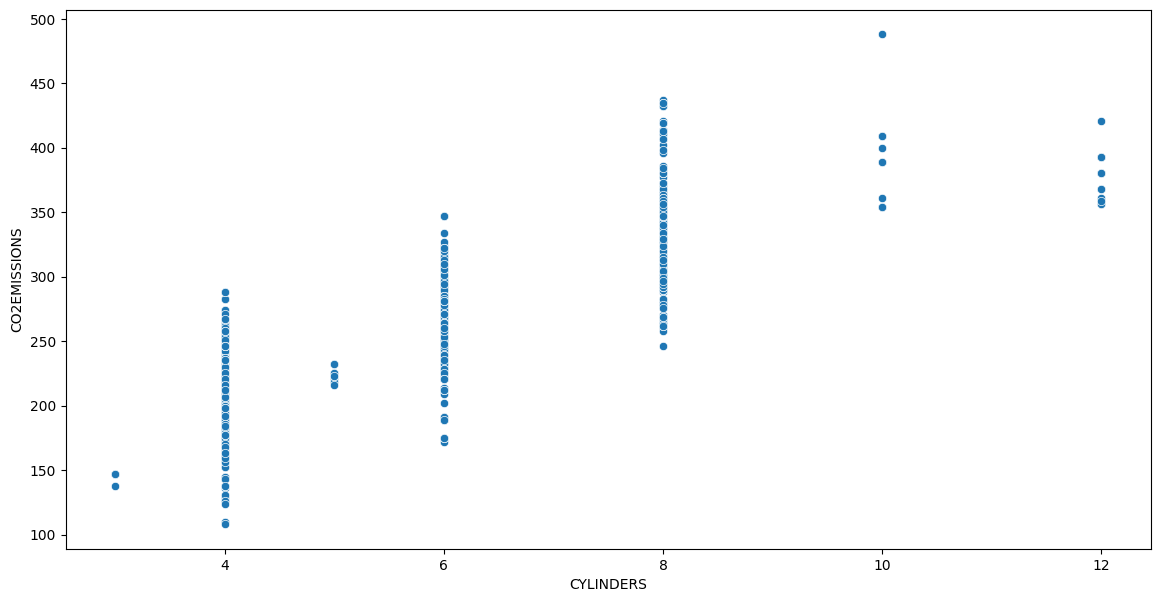

In [23]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=new_df.CYLINDERS, y=new_df.CO2EMISSIONS)
plt.show()

In [24]:
# extracting the input feature and target output variables, X and y, from the dataset.
X = new_df.ENGINESIZE.to_numpy()
y = new_df.CO2EMISSIONS.to_numpy()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

print("Coefficients: ", regressor.coef_[0])
print("Intercept: ", regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


### Visualize model outputs

<function matplotlib.pyplot.show(close=None, block=None)>

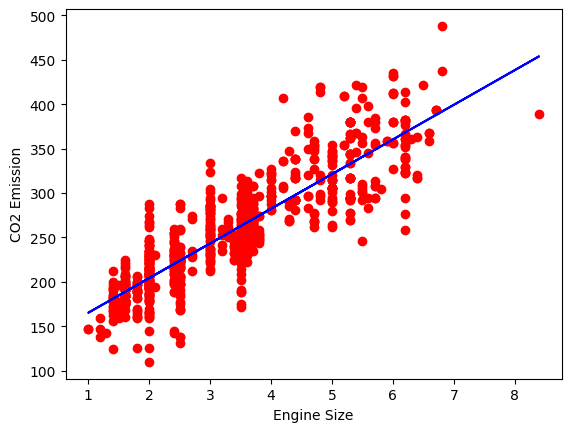

In [40]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.coef_[0] * X_train + regressor.intercept_, "-b")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

yhat = regressor.predict(X_test.reshape(-1, 1))
print("Mean absolute error: %.2f"% mean_absolute_error(yhat, y_test))
print("Mean squared error: %.2f"% mean_squared_error(yhat, y_test))
print("Root mean squared error: %.2f"% root_mean_squared_error(yhat, y_test))
print("R square value: %.2f"% r2_score(yhat, y_test))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R square value: 0.68


### 1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.

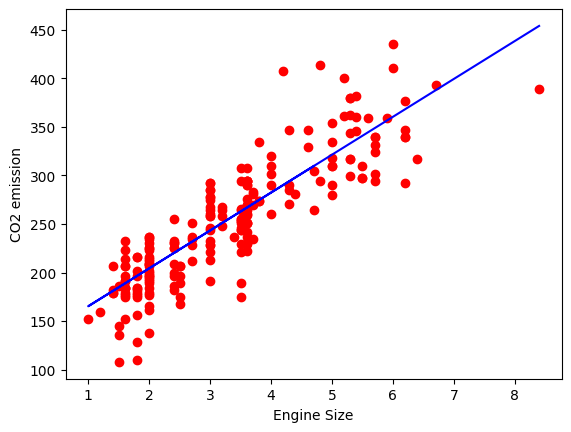

In [43]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, regressor.coef_[0] * X_test + regressor.intercept_,"-b")
plt.xlabel("Engine Size")
plt.ylabel("CO2 emission")
plt.show()

#### Let's see the evaluation metrics if you train a regression model using the FUELCONSUMPTION_COMB feature.
### 2. Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets.

In [45]:
X = new_df["FUELCONSUMPTION_COMB"].to_numpy()
y = new_df["CO2EMISSIONS"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [48]:
reg = linear_model.LinearRegression()
reg.fit(X_train.reshape(-1, 1), y_train)

print("Coeeficients: ", reg.coef_[0])
print("Intercept: ", reg.intercept_)

Coeeficients:  16.18090078119919
Intercept:  69.10302617988452


In [49]:
y_hat = reg.predict(X_test.reshape(-1, 1))
print("Mean Squared Error: %.2f"% mean_squared_error(y_hat, y_test))

Mean Squared Error: 797.43
